In [1]:
from sympy import *
init_printing() #for pretty printing of symbolic maniputlation output in latex

In [2]:
x = Symbol('x')
y = Symbol('y')

In [5]:
expand((x+y)**3)

In [9]:
'{:^+10.8f} {:^+4f}'.format(3.14, -3.14) 

'+3.14000000 -3.140000'

In [3]:
import pandas as pd
import html5lib
import bs4 #beautiful soup
import numpy as np
from xml.sax import ContentHandler, parse


In [4]:
# Reference https://goo.gl/KaOBG3 and 
# http://stackoverflow.com/questions/33470130/read-excel-xml-xls-file-with-pandas
class ExcelHandler(ContentHandler):
    def __init__(self):
        self.chars = [  ]
        self.cells = [  ]
        self.rows = [  ]
        self.tables = [  ]
    def characters(self, content):
        self.chars.append(content)
    def startElement(self, name, atts):
        if name=="Cell":
            self.chars = [  ]
        elif name=="Row":
            self.cells=[  ]
        elif name=="Table":
            self.rows = [  ]
    def endElement(self, name):
        if name=="Cell":
            self.cells.append(''.join(self.chars))
        elif name=="Row":
            self.rows.append(self.cells)
        elif name=="Table":
            self.tables.append(self.rows)


In [ ]:
#get Fed Speeches:
#https://www.federalreserve.gov/newsevents/speech/2016speech.htm

In [107]:
#get tips data
excelHandler = ExcelHandler()#instantiate object
parse('https://www.federalreserve.gov/econresdata/researchdata/feds200805.xls', excelHandler)


In [108]:
#create dateframe
tips_data = pd.DataFrame(
    pd.DataFrame(excelHandler.tables[0][18:]).values[1:,1:],#data
    index=pd.to_datetime(pd.DataFrame(excelHandler.tables[0][18:]).values[1:,0]),#row labels; dates
    columns=pd.DataFrame(excelHandler.tables[0][18:]).values[0,1:]#column labels
    )
#clean up column names:
tips_data.columns=tips_data.columns.str.strip()#.str.lower()
tips_data=tips_data.filter(regex='TIPSY')
#convert data to numeric
for c in tips_data.columns:
    tips_data[c] = pd.to_numeric(tips_data[c],errors='coerce')

tips_data = tips_data.sort_index()

tips_data.head()



,TIPSY02,TIPSY03,TIPSY04,TIPSY05,TIPSY06,TIPSY07,TIPSY08,TIPSY09,TIPSY10,TIPSY11,...,BKEVENF20,BKEVEN1F4,BKEVEN1F9,BKEVEN5F5,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
1999-01-04,NaN,NaN,NaN,3.9244,3.9369,3.9310,3.9170,3.9002,3.8832,3.8673,...,2.1389,0.6546,2.1212,1.5634,3.6688,-1.7499,3.0498,NaN,1.7262,NaN
1999-01-05,NaN,NaN,NaN,3.9385,3.9525,3.9475,3.9340,3.9175,3.9005,3.8845,...,2.2029,0.6754,2.1493,1.5840,3.6826,-1.7540,3.0624,NaN,1.7479,NaN
1999-01-06,NaN,NaN,NaN,3.8522,3.8357,3.8182,3.8026,3.7893,3.7783,3.7691,...,2.1431,0.9434,2.1055,1.6518,3.6753,-1.8079,2.7590,NaN,1.0862,NaN
1999-01-07,NaN,NaN,NaN,3.8995,3.8827,3.8550,3.8282,3.8051,3.7859,3.7698,...,2.2173,0.8224,2.3029,1.8021,3.6067,-9.9883,11.8613,NaN,0.9583,NaN
1999-01-08,NaN,NaN,NaN,3.9043,3.8985,3.8771,3.8525,3.8293,3.8089,3.7913,...,2.2188,0.8888,2.3839,1.8609,3.6057,-4.4381,6.1063,NaN,1.2291,NaN


In [111]:
tips_data.describe()

,TIPSY02,TIPSY03,TIPSY04,TIPSY05,TIPSY06,TIPSY07,TIPSY08,TIPSY09,TIPSY10,TIPSY11,...,BKEVENF20,BKEVEN1F4,BKEVEN1F9,BKEVEN5F5,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
count,3095.000000,3095.000000,3095.00000,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,...,4321.000000,4321.000000,4321.000000,4321.000000,4345.000000,4345.000000,4345.000000,3098.000000,4345.000000,3098.000000
mean,0.123697,0.263000,0.42840,1.270058,1.411061,1.530710,1.632997,1.720768,1.796173,1.860930,...,2.475859,2.133576,2.790282,2.575427,4.586231,-8.484971,-209.204647,286.592559,2.762315,17.859749
std,1.458861,1.337625,1.25679,1.572145,1.514368,1.456187,1.400332,1.348295,1.300768,1.257967,...,0.615518,0.403595,0.435706,0.360728,5.774358,66.852410,5896.251531,6981.168418,2.607693,11.347393
min,-2.202000,-2.067000,-1.89280,-1.724000,-1.538900,-1.357800,-1.188300,-1.016600,-0.862700,-0.724600,...,-0.742800,0.485900,1.305300,1.336100,0.000000,-1331.498657,-183813.517600,-40412.588798,0.100000,0.436327
25%,-1.055050,-0.933900,-0.63060,-0.039475,0.152350,0.319150,0.456200,0.585925,0.685825,0.786400,...,2.155300,1.863000,2.582500,2.416500,1.461966,-5.962488,-5.911649,-14.691889,1.190363,5.333289
50%,-0.126100,0.053600,0.26500,1.243950,1.400750,1.542150,1.657600,1.761250,1.848500,1.921300,...,2.553900,2.246100,2.824000,2.612300,3.124400,-2.902191,-2.681086,-2.620848,1.998098,15.767847
75%,0.983150,1.132350,1.28770,2.382450,2.387700,2.415550,2.443800,2.469575,2.495175,2.521750,...,2.814100,2.433400,3.088000,2.808300,4.066600,-0.694500,1.652600,6.019598,4.220037,30.000000
max,5.479800,4.486200,4.01380,4.378400,4.385600,4.383800,4.380900,4.377400,4.371100,4.366800,...,3.873300,2.814800,3.923900,3.625300,25.000000,1696.301410,40412.078681,183812.729900,33.069000,30.000000


In [109]:
#get nominal data
excelHandler = ExcelHandler()#instantiate object
parse('http://www.federalreserve.gov/econresdata/researchdata/feds200628.xls', excelHandler)


In [110]:
#create dateframe
nominal_data = pd.DataFrame(
    pd.DataFrame(excelHandler.tables[0][9:]).values[1:,1:],#data
    index=pd.to_datetime(pd.DataFrame(excelHandler.tables[0][9:]).values[1:,0]),#row labels; dates
    columns=pd.DataFrame(excelHandler.tables[0][9:]).values[0,1:]#column labels
    )
#clean up column names:
nominal_data.columns=nominal_data.columns.str.strip()#.str.lower()
nominal_data=nominal_data.filter(regex='SVENY')

#convert data to numeric
for c in nominal_data.columns:
    nominal_data[c] = pd.to_numeric(nominal_data[c],errors='coerce')

nominal_data = nominal_data.sort_index()

nominal_data.head()

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENF30,SVEN1F01,SVEN1F04,SVEN1F09,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
1961-06-14,2.9825,3.3771,3.5530,3.6439,3.6987,3.7351,3.7612,NaN,NaN,NaN,...,NaN,3.8067,3.9562,NaN,3.917606,-1.277955,-1.949397,0,0.339218,-999.99
1961-06-15,2.9941,3.4137,3.5981,3.6930,3.7501,3.7882,3.8154,NaN,NaN,NaN,...,NaN,3.8694,4.0183,NaN,3.978498,-1.257404,-2.247617,0,0.325775,-999.99
1961-06-16,3.0012,3.4142,3.5994,3.6953,3.7531,3.7917,3.8192,NaN,NaN,NaN,...,NaN,3.8634,4.0242,NaN,3.984350,-1.429538,-1.885024,0,0.348817,-999.99
1961-06-19,2.9949,3.4386,3.6252,3.7199,3.7768,3.8147,3.8418,NaN,NaN,NaN,...,NaN,3.9196,4.0447,NaN,4.004379,-0.723311,-3.310743,0,0.282087,-999.99
1961-06-20,2.9833,3.4101,3.5986,3.6952,3.7533,3.7921,3.8198,NaN,NaN,NaN,...,NaN,3.8732,4.0257,NaN,3.985789,-0.900432,-2.844809,0,0.310316,-999.99


In [116]:
nominal_data.describe()

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
count,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,11138.000000,11138.000000,11138.000000,...,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,5.243493,5.472491,5.656220,5.809632,5.941215,6.055520,6.155301,6.507454,6.598660,6.678448,...,5.973184,5.978409,5.979865,5.977996,5.973204,5.965849,5.956250,5.944695,5.931439,5.916711
std,3.274108,3.191461,3.098593,3.009209,2.928038,2.856445,2.794460,2.921639,2.863796,2.814441,...,1.897400,1.890294,1.884169,1.878928,1.874487,1.870778,1.867746,1.865347,1.863544,1.862308
min,0.082800,0.158300,0.302500,0.431300,0.588600,0.762000,0.941900,1.121400,1.295500,1.460700,...,2.217000,2.237300,2.255900,2.273000,2.288700,2.303300,2.316700,2.329300,2.340900,2.351800
25%,3.148450,3.462825,3.697200,3.824775,3.936650,4.011350,4.074350,4.320725,4.471000,4.587450,...,4.670025,4.662300,4.649750,4.637675,4.624350,4.606375,4.584175,4.560400,4.538650,4.509000
50%,5.279400,5.466200,5.640650,5.748300,5.855400,5.950150,6.017700,6.455500,6.509650,6.539300,...,5.833100,5.832300,5.828700,5.821250,5.809600,5.796300,5.780050,5.760850,5.740800,5.720000
75%,7.091825,7.321200,7.442850,7.561700,7.653225,7.696325,7.717350,8.136275,8.160050,8.188150,...,7.722225,7.728075,7.734100,7.730700,7.719300,7.718875,7.716975,7.712350,7.708675,7.698575
max,16.462000,15.911800,15.574600,15.349800,15.177600,15.061100,15.010900,14.979900,14.957200,14.939800,...,10.485600,10.520600,10.555300,10.589300,10.621700,10.652600,10.681900,10.709900,10.736500,10.761800


In [115]:
tips_data=tips_data.filter(regex='TIPSY')
nominal_data=nominal_data.filter(regex='SVENY')

In [117]:
tips_data.index

DatetimeIndex(['1999-01-04', '1999-01-05', '1999-01-06', '1999-01-07',
               '1999-01-08', '1999-01-11', '1999-01-12', '1999-01-13',
               '1999-01-14', '1999-01-15',
               ...
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14',
               '2016-04-15', '2016-04-18'],
              dtype='datetime64[ns]', length=4345, freq=None)

In [120]:
tips_data.columns.values.tolist()

[u'TIPSY02',
 u'TIPSY03',
 u'TIPSY04',
 u'TIPSY05',
 u'TIPSY06',
 u'TIPSY07',
 u'TIPSY08',
 u'TIPSY09',
 u'TIPSY10',
 u'TIPSY11',
 u'TIPSY12',
 u'TIPSY13',
 u'TIPSY14',
 u'TIPSY15',
 u'TIPSY16',
 u'TIPSY17',
 u'TIPSY18',
 u'TIPSY19',
 u'TIPSY20']

In [122]:
type(tips_data[tips_data.columns.values.tolist()])

pandas.core.frame.DataFrame

In [ ]:
tips_data.to_csv()

In [123]:
from import_data import *

%matplotlib inline

['/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-1c0d2e6b-dd33-4013-9f0b-270af5a9f8fc.json']


In [124]:

data_US_NB, US_NB_dates, data_US_ILB, US_ILB_dates, nominal_data, tips_data = ImportData().importUS_Data()

Index([u'tips_data column kept are:\nTIPSY02',
       u'tips_data column kept are:\nTIPSY03',
       u'tips_data column kept are:\nTIPSY04',
       u'tips_data column kept are:\nTIPSY05',
       u'tips_data column kept are:\nTIPSY06',
       u'tips_data column kept are:\nTIPSY07',
       u'tips_data column kept are:\nTIPSY08',
       u'tips_data column kept are:\nTIPSY09',
       u'tips_data column kept are:\nTIPSY10',
       u'tips_data column kept are:\nTIPSY11',
       u'tips_data column kept are:\nTIPSY12',
       u'tips_data column kept are:\nTIPSY13',
       u'tips_data column kept are:\nTIPSY14',
       u'tips_data column kept are:\nTIPSY15',
       u'tips_data column kept are:\nTIPSY16',
       u'tips_data column kept are:\nTIPSY17',
       u'tips_data column kept are:\nTIPSY18',
       u'tips_data column kept are:\nTIPSY19',
       u'tips_data column kept are:\nTIPSY20'],
      dtype='object')
Index([u'nominal_data column kept are:\nSVENY01',
       u'nominal_data column kept 

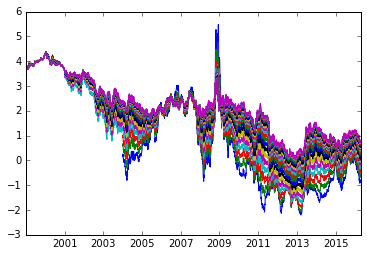

In [125]:
plt.plot(tips_data)
plt.show()

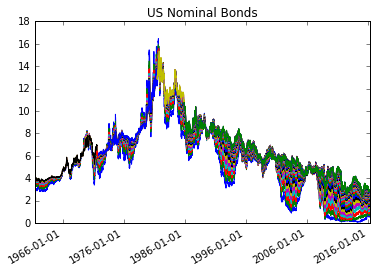

In [128]:

import matplotlib.dates as mdates

fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
figures['fig1_name'] = '\\f1'
figures['ax_fig1'].plot(nominal_data)   # matplotlib does not support NumPy datetime64 objects (at least not yet). Therefore, convert x to Python datetime.datetime
# rotate and align the tick labels so they look better
figures['fig1'].autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
#ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')  # DateFormatter('%Y-%m-%d')
figures['ax_fig1'].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# figures['fig1'].suptitle('US Nominal Bonds')
figures['ax_fig1'].set_title('US Nominal Bonds')
labels = figures['ax_fig1'].get_xticklabels()
plt.setp(labels, rotation=30)
plt.draw()

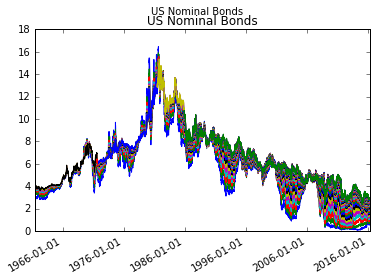

In [130]:
plt.close()
fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
figures['fig1_name'] = '\\f1'
figures['ax_fig1'].plot(nominal_data)   
# rotate and align the tick labels so they look better
figures['fig1'].autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
figures['ax_fig1'].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
figures['fig1'].suptitle('US Nominal Bonds')
figures['ax_fig1'].set_title('US Nominal Bonds')
labels = figures['ax_fig1'].get_xticklabels()
plt.setp(labels, rotation=30)
plt.show()

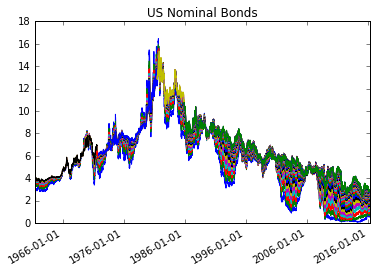

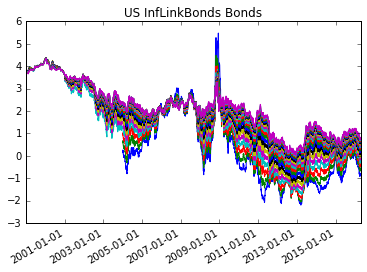

In [135]:

fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
figures['fig1_name'] = '\\f1'
figures['ax_fig1'].plot(nominal_data)   
# rotate and align the tick labels so they look better
figures['fig1'].autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
figures['ax_fig1'].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
figures['ax_fig1'].set_title('US Nominal Bonds')
labels = figures['ax_fig1'].get_xticklabels()
plt.setp(labels, rotation=30)
plt.draw()

fig, ax = plt.subplots(1)
figures['fig2'] = fig
figures['ax_fig2'] = ax
figures['fig2_name'] = '\\f2'
figures['ax_fig2'].plot(tips_data)   
# rotate and align the tick labels so they look better
figures['fig2'].autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
figures['ax_fig2'].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
labels = figures['ax_fig2'].get_xticklabels()
plt.setp(labels, rotation=30)
plt.draw()

In [163]:

filename = r""+os.getcwd()+"/output/figures" +'/n'+ ".png"

In [164]:
filename

'/Users/serginio/GitHub/ssylvain/research/haats/output/figures/n.png'

In [138]:
os.getcwd()

'/Users/serginio/GitHub/ssylvain/research/haats'

In [157]:
filename = r""+os.getcwd()+"\output\figures" + \
                        str(figures['fig2_name']) + ".png"
            #figures['fig2'].savefig(filename, format="png")

In [166]:
str.replace(os.getcwd(), '/','\')

SyntaxError: EOL while scanning string literal (<ipython-input-166-462803e4ed69>, line 1)

In [188]:
str.replace("test\\",'\\','/')

'test/'

In [183]:
print '\\'

\


In [192]:
print nominal_data.describe()

            SVENY01       SVENY02       SVENY03       SVENY04       SVENY05  \
count  13674.000000  13674.000000  13674.000000  13674.000000  13674.000000   
mean       5.243493      5.472491      5.656220      5.809632      5.941215   
std        3.274108      3.191461      3.098593      3.009209      2.928038   
min        0.082800      0.158300      0.302500      0.431300      0.588600   
25%        3.148450      3.462825      3.697200      3.824775      3.936650   
50%        5.279400      5.466200      5.640650      5.748300      5.855400   
75%        7.091825      7.321200      7.442850      7.561700      7.653225   
max       16.462000     15.911800     15.574600     15.349800     15.177600   

            SVENY06       SVENY07       SVENY08       SVENY09       SVENY10  \
count  13674.000000  13674.000000  11138.000000  11138.000000  11138.000000   
mean       6.055520      6.155301      6.507454      6.598660      6.678448   
std        2.856445      2.794460      2.921639    

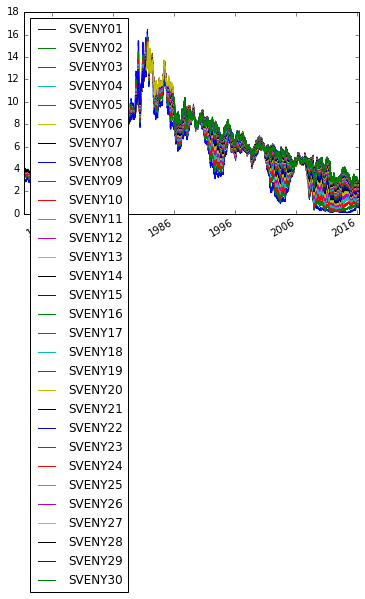

In [191]:
nominal_data.plot()


In [193]:
filename = r""+str.replace(os.getcwd(), '\\', '/')+"/output/figures" + \
                        str(figures['fig1_name']) + ".png"
figures['fig1'].savefig(filename, format="png")


In [194]:
filename

'/Users/serginio/GitHub/ssylvain/research/haats/output/figures\\f1.png'

In [196]:
tips_data.index
(tips_data.index >= '1999-01-04')&(tips_data.index <= '2009-01-04')

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [201]:
tips_data.ix[(tips_data.index == '1970-01-04'),:].values

array([], shape=(0, 19), dtype=float64)

In [203]:
tips_data.index.union(nominal_data.index)


DatetimeIndex(['1961-06-14', '1961-06-15', '1961-06-16', '1961-06-19',
               '1961-06-20', '1961-06-21', '1961-06-22', '1961-06-23',
               '1961-06-26', '1961-06-27',
               ...
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14',
               '2016-04-15', '2016-04-18'],
              dtype='datetime64[ns]', length=13699, freq=None)

In [204]:
len(nominal_data.index)

13675

In [205]:
len(tips_data.index)

4345

In [206]:
nominal_data.shape

(13675, 30)

In [217]:
converted = nominal_data.asfreq('1q', method='pad')
converted.head()

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1961-06-30,2.9011,3.2795,3.5036,3.6316,3.7109,3.7640,3.8020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-30,2.9358,3.3250,3.5412,3.6661,3.7442,3.7968,3.8345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-12-31,3.1375,3.4212,3.6259,3.7658,3.8532,3.8981,3.9089,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,2.8932,3.1598,3.3510,3.4908,3.5950,3.6743,3.7357,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,3.0561,3.3039,3.5095,3.6532,3.7516,3.8209,3.8713,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
converted.head()

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1961-06-30,2.9011,3.2795,3.5036,3.6316,3.7109,3.7640,3.8020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-07-31,2.7780,3.2304,3.5068,3.6787,3.7907,3.8678,3.9234,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-31,2.9863,3.3990,3.6481,3.7919,3.8812,3.9412,3.9841,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-10-31,2.8936,3.2396,3.4616,3.6087,3.7096,3.7813,3.8339,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
nominal_data.ix[nominal_data.index>='1961-08-30',:]

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1961-08-30,3.0268,3.4183,3.6436,3.7745,3.8564,3.9115,3.9510,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-31,2.9863,3.3990,3.6481,3.7919,3.8812,3.9412,3.9841,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-01,3.0361,3.4409,3.6703,3.8025,3.8849,3.9403,3.9799,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-05,3.0435,3.4513,3.6783,3.8082,3.8889,3.9431,3.9819,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-06,3.0411,3.4623,3.6858,3.8105,3.8873,3.9388,3.9756,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-07,3.0398,3.4616,3.6863,3.8111,3.8877,3.9390,3.9756,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-08,3.0500,3.4787,3.7021,3.8251,3.9004,3.9507,3.9867,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-11,3.0558,3.4661,3.6864,3.8097,3.8855,3.9364,3.9727,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-12,3.0506,3.4643,3.6860,3.8097,3.8857,3.9366,3.9730,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-13,3.0571,3.4620,3.6796,3.8012,3.8760,3.9261,3.9619,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


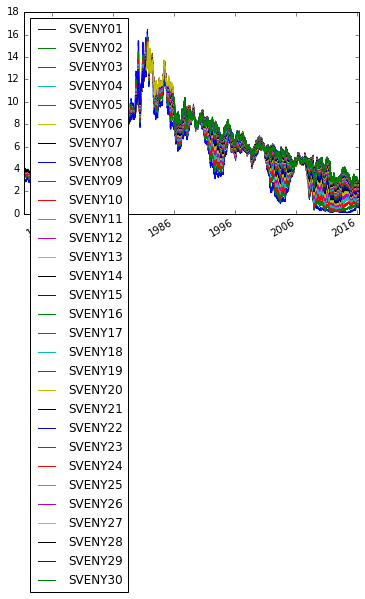

In [225]:
ax = nominal_data.plot()
ax.legend()

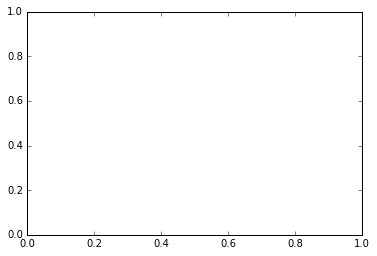

In [226]:
plt.close()
fig, ax = plt.subplots(1)

In [227]:

figures['fig2_name'] = '/tips_raw_data'
tips_data.plot(figures['ax_fig2']=gca,figures['fig2']=gcf)
plt.legend(loc='center left')
# use a more precise date string for the x axis locations in the
# toolbar
figures['ax_fig2'].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
plt.show()

SyntaxError: keyword can't be an expression (<ipython-input-227-ea3ec6057cc4>, line 3)

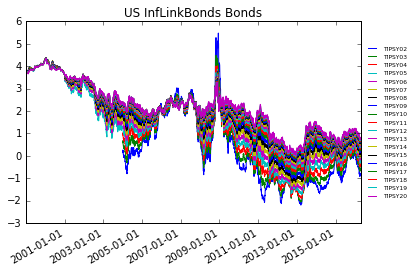

In [230]:
plt.close()
fig, ax = plt.subplots(1)
figures['fig2'] = fig
figures['ax_fig2'] = ax
figures['fig2_name'] = '/tips_raw_data'
tips_data.plot(ax=figures['ax_fig2'])
plt.legend(loc='center left',fontsize=6,frameon=0, bbox_to_anchor=(1, 0.5))
# use a more precise date string for the x axis locations in the
# toolbar
figures['ax_fig2'].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
plt.show()